#### Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Read Data from json

In [15]:
df = pd.read_csv('fake_news_processed.csv', sep=";")
print(df.shape)
print(df.tail())
print(df.dtypes)

(2775, 7)
      src_id                                                url  \
2770  776091  https://de.reuters.com/article/m-rkte-ausblick...   
2771  776092  https://de.reuters.com/article/deutschland-gr-...   
2772  776093  https://de.reuters.com/article/deutschland-eur...   
2773  776094  https://de.reuters.com/article/nahost-idDEKBN1...   
2774  776095  https://de.reuters.com/article/deutschland-koa...   

                                                  title  \
2770  HINTERGRUND-Experten erwarten 2018 Dax-Rekordl...   
2771  Schleswig-Holsteins Umweltminister Habeck will...   
2772  SPD-Chef Schulz stößt mit Europa-Vorstoß auf A...   
2773  Palästinenser-Proteste gegen Jerusalem-Beschlu...   
2774  Union warnt SPD vor überzogenem Forderungskatalog   

                                                   text                 date  \
2770  Anleger, bitte anschnallen: Der Höhenflug des ...  2017-12-10 00:00:00   
2771  Schleswig-Holsteins Umweltminister Robert Habe...  2017-12-10 00:0

## Visualization/Analysis of Dataset

#### Plot of article dates

In [10]:
print(df["date"].groupby([df["date"].dt.year.astype('Int64'), df["date"].dt.month.astype('Int64')]).count())
df["date"].groupby([df["date"].dt.year.astype('Int64'), df["date"].dt.month.astype('Int64')]).count().plot(kind="bar", figsize=(8,8), rot="65", fontsize=15)

AttributeError: Can only use .dt accessor with datetimelike values

#### Plot of ratio of fake statements - Percentage of fake found in the article

1 = Text is based on true information. Up to 25% of the information in the text is false

2 = Up to 50% of the information in the text is false. The other statements in the article are factually accurate

3 = Up to 75% of the content non-factual and incorrect

4 = Pure fabrication with up to 100% false information in text 

9 = Unclear, unverifiable


Ratio_of_Fake_Statements
1    235
2    149
3     82
4     20
9      4
Name: Ratio_of_Fake_Statements, dtype: int64


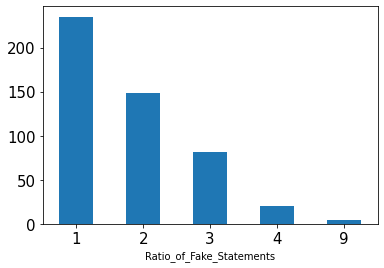

In [6]:
df["Ratio_of_Fake_Statements"].groupby([df["Ratio_of_Fake_Statements"]]).count().plot(kind="bar",  rot="0", fontsize=15)
print(df["Ratio_of_Fake_Statements"].groupby([df["Ratio_of_Fake_Statements"]]).count())
# df.hist(bins=30, figsize=(10, 10))

Overall_Rating of the disinformation in text: range [0.1:1.0].

0.1 no disinformation in text 

0.2

0.3

0.4

0.5 neutral / ambivalent 
0.6

0.7

0.8

0.9

1.0 strong disinformative text

Overall_Rating
0.1     5
0.2    37
0.3    50
0.4    36
0.5    51
0.6    88
0.7    91
0.8    89
0.9    31
1.0    12
Name: Overall_Rating, dtype: int64


<AxesSubplot:xlabel='Overall_Rating'>

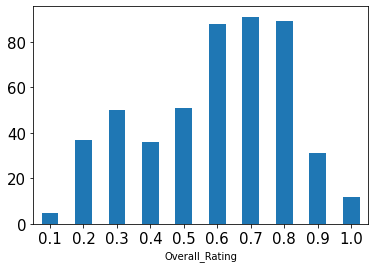

In [7]:
print(df["Overall_Rating"].groupby([df["Overall_Rating"]]).count())
df["Overall_Rating"].groupby([df["Overall_Rating"]]).count().plot(kind="bar",  rot="0", fontsize=15)

False_Statement_1_Location
Image      20
Teaser     50
Text      198
Title     222
Name: False_Statement_1_Location, dtype: int64


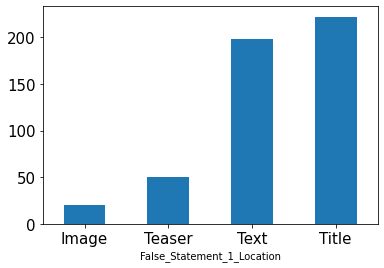

In [8]:
df["False_Statement_1_Location"].groupby([df["False_Statement_1_Location"]]).count().plot(kind="bar",  rot="0", fontsize=15)
print(df["False_Statement_1_Location"].groupby([df["False_Statement_1_Location"]]).count())

False_Statement_2_Location
          171
Image      16
Teaser     33
Text      248
Title      22
Name: False_Statement_2_Location, dtype: int64


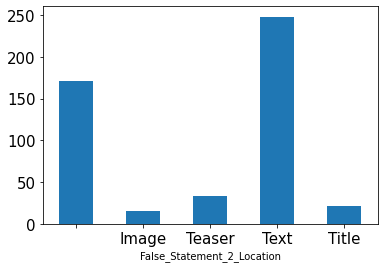

In [9]:
df["False_Statement_2_Location"].groupby([df["False_Statement_2_Location"]]).count().plot(kind="bar",  rot="0", fontsize=15)
print(df["False_Statement_2_Location"].groupby([df["False_Statement_2_Location"]]).count())

False_Statement_3_Location
          327
Image       6
Teaser      5
Text      149
Title       3
Name: False_Statement_3_Location, dtype: int64


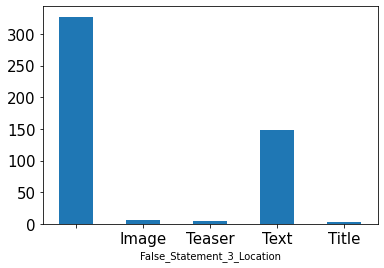

In [86]:
df["False_Statement_3_Location"].groupby([df["False_Statement_3_Location"]]).count().plot(kind="bar",  rot="0", fontsize=15)
print(df["False_Statement_3_Location"].groupby([df["False_Statement_3_Location"]]).count())

In [11]:
df_urls = df["URL"]

In [12]:
df_urls

0      https://schluesselkindblog.com/2017/08/30/proz...
1      http://blauerbote.com/2017/12/18/bild-journali...
2      http://blauerbote.com/2017/06/02/angela-merkel...
3      http://smopo.ch/deutschlands-neonazis-waehlen-...
4      http://www.truth24.net/gruppenvergewaltigung-s...
                             ...                        
485    http://www.anonymousnews.ru/2017/11/01/sex-dsc...
486    https://blog.halle-leaks.de/messer-jihad-in-ko...
487    https://blog.halle-leaks.de/erzieherin-will-vo...
488    https://www.compact-online.de/armer-martin-sch...
489    https://de.sott.net/article/32263-Kindesmissbr...
Name: URL, Length: 490, dtype: object